In [189]:
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
#import matplotlib.animation as animation
from IPython.display import HTML
import scipy.constants as c
import random
%matplotlib inline

In [190]:
def rand_type():
    val = random.random()
    if val < initial_type_ratio:
        return 'elliptical'
    return 'spiral'

def gravity_force(galaxy_one, galaxy_two):
    G = c.G
    dist = galaxy_one.distance(galaxy_two)
    force = (galaxy_one.mass * galaxy_two.mass)/dist**2
    angle = galaxy_one.angle(galaxy_two)
    xforce = force * np.cos(angle)
    yforce = force * np.sin(angle)
    return xforce, yforce

class Galaxy:
    
    def __init__(self, id_, x, y, mass, gal_type):
        self.id_ = id_
        self.x = x
        self.y = y
        self.vx = 0
        self.vy = 0
        self.mass = mass
        self.gal_type = gal_type
        if gal_type == 'elliptical':
            self.color = 'r'
        else:
            self.color = 'b'
    
    def __repr__(self):
        return f'Galaxy #{self.id_}:\n\t mass: {self.mass}\n\t coordinates\n\t ({self.x}, {self.y})\n\t velocity: ({self.vx}, {self.vy})\n\t type: {self.gal_type}\n'
    
    def __str__(self):
        return f'Galaxy #{self.id_}:\n\t mass: {self.mass}\n\t coordinates\n\t ({self.x}, {self.y})\n\t velocity: ({self.vx}, {self.vy})\n\t type: {self.gal_type}\n'
    
    def distance_x(self, other_galaxy):
        return other_galaxy.x - self.x
    
    def distance_y(self, other_galaxy):
        return other_galaxy.y - self.y
    
    def angle(self, other_galaxy):
        x = self.distance_x(other_galaxy)
        y = self.distance_y(other_galaxy)
        return np.arctan2(y, x)
    
    def distance(self, other_galaxy):
        return np.sqrt((self.x - other_galaxy.x)**2 + (self.y - other_galaxy.y)**2)
    
    def collide(self, other_galaxy):
        print('collision')
        active_galaxies.remove(other_galaxy.id_)
        self.gal_type = 'elliptical'
        self.color = 'r'
        total_mass = self.mass + other_galaxy.mass #next lines for conservation of momentum
        self.vx = (self.mass * self.vx + other_galaxy.mass * other_galaxy.vx) / total_mass
        self.vy = (self.mass * self.vy + other_galaxy.mass * other_galaxy.vy) / total_mass
        self.mass += total_mass
    
    def time_update(self, other_galaxy_list):
        for galaxy in other_galaxy_list:
            if (galaxy != self) and (galaxy.id_ in active_galaxies):
                collision_distance = self.mass/galaxy.mass #update to account for mass of galaxy?
                force_x, force_y = gravity_force(self, galaxy)
                ax, ay = force_x/self.mass, force_y/self.mass
                self.vx += ax * time_step
                self.vy += ay * time_step
                self.x += self.vx * time_step
                self.y += self.vy * time_step
                if self.distance(galaxy) < collision_distance:
                    self.collide(galaxy)
            elif (galaxy == self) and (galaxy.id_ in active_galaxies):
                self.x += self.vx * time_step
                self.y += self.vy * time_step

Final fraction elliptical: 0.35


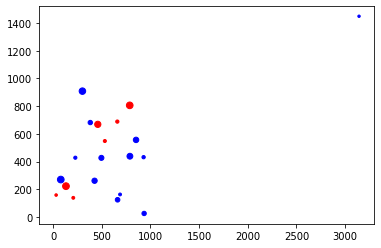

In [192]:
universe_size = 1000
galaxy_number = 20
initial_type_ratio = 0.5
time_step = 0.05
time_max = 4.5
time = 0

active_galaxies = []
galaxies = []
positions = []

x = np.random.randint(0, universe_size, galaxy_number)
y = np.random.randint(0, universe_size, galaxy_number)
masses = np.random.randint(100, 1000, galaxy_number)

for i in range(len(x)):
    gal_type = rand_type()
    galaxies.append(Galaxy(i, x[i], y[i], masses[i], gal_type))
    active_galaxies.append(i)

fig = plt.figure()
camera = Camera(fig)

while time <= time_max:
    t_positions = []
    t_positions_x = []
    t_positions_y = []
    t_positions_c = []
    t_positions_m = []
    for galaxy in galaxies:
        if galaxy.id_ in active_galaxies:
            galaxy.time_update(galaxies)
            t_positions.append((galaxy.x, galaxy.y, galaxy.color))
            t_positions_x.append(galaxy.x)
            t_positions_y.append(galaxy.y)
            t_positions_c.append(galaxy.color)
            t_positions_m.append(galaxy.mass/20) #the 20 is simply so the dots are scaled reasonably

    plt.scatter(t_positions_x, t_positions_y, c=t_positions_c, s=t_positions_m)
    camera.snap()
    positions.append(t_positions)

    time += time_step

#print(galaxies)

total = len(active_galaxies)
elliptical = 0
for galaxy in galaxies:
    if galaxy.id_ in active_galaxies:
        if galaxy.gal_type == 'elliptical':
            elliptical += 1

print('Final fraction elliptical:', round(elliptical/total, 4))
animation = camera.animate()
HTML(animation.to_html5_video())
#animation.save('galaxies.gif')